In [1]:
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Fluxonium 1

In [2]:
loop1 = sq.Loop()

C = sq.Capacitor(4, 'GHz', error=10)
L = sq.Inductor(3,'GHz', loops=[loop1])
JJ = sq.Junction(100,'GHz', loops=[loop1])

circuitElements = {
    (0, 1): [C, L, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([80])

## Eigenfrequencies

In [3]:
numEig = 5
phiExt = np.linspace(0.0, 1.0, 50) * 2 * np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
sq.unit.setFreq('GHz')
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    eigenValues[:, i], _ = cr1.run(numEig)

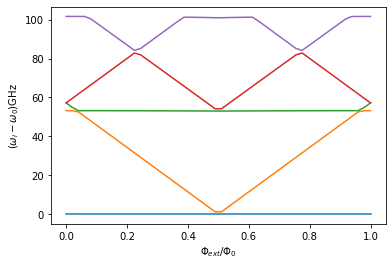

In [4]:
plt.figure()
for i in range(numEig):
    plt.plot(phiExt / 2 / np.pi, (eigenValues[i, :] - eigenValues[0, :]))

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

## Robustness Analysis

In [5]:
sq.unit.setFreq('MHz')

In [6]:
cr1 = sq.Circuit(circuitElements)
cr1.setTruncationNumbers([80])
loop1.setFlux(np.pi)
freqs, _ = cr1.run(numEig)
omega_q_d = freqs[1] - freqs[0]
print("Design frequency is: {}MHz".format(omega_q_d))

Design frequency is: 0.5605275626730872MHz


In [7]:
numTrial = 100
omega_q = []

for i in range(numTrial):
    cr1 = sq.Circuit(circuitElements, random=True)
    cr1.setTruncationNumbers([80])
    loop1.setFlux(np.pi)
    freqs, _ = cr1.run(numEig)
    omega_q.append((freqs[1] - freqs[0]))

(0.01, 3.0)

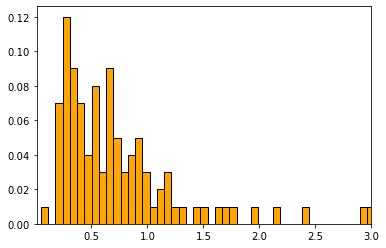

In [8]:
weights = np.ones_like(omega_q) / len(omega_q)
_ ,_ ,_ = plt.hist(omega_q, 50, weights=weights, color="orange", edgecolor='black')
plt.xlim([0.01,3])

# Fluxonium 2

In [9]:
C = sq.Capacitor(3.6, 'GHz', Q=3e6, error=10)
L = sq.Inductor(0.46,'GHz', loops=[loop1])
JJ = sq.Junction(10.2,'GHz', loops=[loop1])

circuitElements = {
    (0, 1): [C, L, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([80])

## decay process

In [10]:
cr1.setTemperature(1e-3)

numEig = 2
phiExt = np.linspace(0.0, 0.5, 50) * 2 * np.pi
decays = np.zeros(len(phiExt))
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    cr1.run(numEig)
    decays[i] =cr1.decayRate('dielectric',states=(0,1))

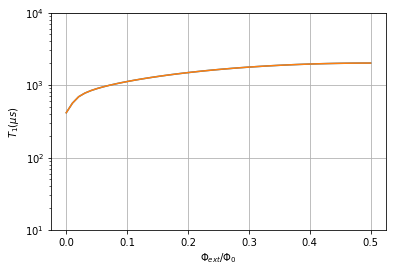

In [11]:
plt.figure()
for i in range(numEig):
    plt.semilogy(phiExt / 2 / np.pi, 1/decays/1e-6)

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"$T_1(\mu s)$")
plt.ylim([1e1,1e4])
plt.grid()
plt.show()